In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
location = pd.read_csv("C:\\Users\\nagynoorbert\\Documents\\bi_analyst_assignment_bubi (2)\\bi_analyst_assignment_bubi\\bubi_dataset\\station_data.csv")
train = pd.read_csv("C:\\Users\\nagynoorbert\\Documents\\bi_analyst_assignment_bubi (2)\\bi_analyst_assignment_bubi\\bubi_dataset\\train.csv")
weather = pd.read_csv("C:\\Users\\nagynoorbert\\Documents\\bi_analyst_assignment_bubi (2)\\bi_analyst_assignment_bubi\\bubi_dataset\\weather_data.csv")

In [ ]:
location

In [ ]:
weather

In [ ]:
train

In [ ]:
train.info()
weather.info()
location.info()

In [ ]:
nans = weather.shape[0] - weather.dropna().shape[0]
nans

In [ ]:
nans = train.shape[0] - train.dropna().shape[0]
nans

In [ ]:
nans = location.shape[0] - location.dropna().shape[0]
nans

In [ ]:
weather.isnull().sum()

In [ ]:
location.isnull().sum()

In [ ]:
train.isnull().sum()

In [ ]:
char_entries = train.select_dtypes(include=['O'])
char_entries.apply(pd.Series.nunique)

In [ ]:
char_entries = location.select_dtypes(include=['O'])
char_entries.apply(pd.Series.nunique)

In [ ]:
char_entries = weather.select_dtypes(include=['O'])
char_entries.apply(pd.Series.nunique)

In [ ]:
weather.info()

In [ ]:
weather['fog'] = weather['fog'].astype('category')
weather['rain'] = weather['rain'].astype('category')
weather['snow'] = weather['snow'].astype('category')
weather['hail'] = weather['hail'].astype('category')
weather['thunder'] = weather['thunder'].astype('category')
weather['wdird'] = weather['wdird'].astype('category')


In [ ]:
weather['fog'] = weather['fog'].astype('object')
weather['rain'] = weather['rain'].astype('object')
weather['snow'] = weather['snow'].astype('object')
weather['hail'] = weather['hail'].astype('object')
weather['thunder'] = weather['thunder'].astype('object')
weather['wdird'] = weather['wdird'].astype('object')
weather['wdire'] = weather['wdire'].astype('object')


In [ ]:
char_entries = weather.select_dtypes(include=['O'])
char_entries.apply(pd.Series.nunique)

In [590]:
weather['wdire'].value_counts(sort=True)

Variable    1619
NW           820
East         763
WNW          681
North        452
NNW          422
West         361
South        311
ENE          306
ESE          271
SW           235
SSW          189
SE           181
WSW          173
SSE          167
NE           155
NNE          129
Name: wdire, dtype: int64

In [591]:
weather['wdird'].value_counts(sort=True)

0      1739
320     418
300     413
310     402
90      274
290     268
80      251
330     245
100     238
70      184
340     177
280     158
110     151
350     150
60      122
120     120
230     120
220     115
210     113
180     108
170     105
260     103
270     100
360      99
190      98
130      97
240      93
160      91
140      84
10       83
50       81
250      80
150      76
200      76
40       74
20       67
30       62
Name: wdird, dtype: int64

In [592]:
weather['time'] = pd.to_datetime(weather['time'])

In [593]:
weather.set_index('time', inplace=True)

In [594]:
print(weather)

                     tempm  hum  wspdm wdird     wdire  pressurem    vism  \
time                                                                        
2015-01-01 00:00:00  -12.0   85    5.6     0  Variable       1037     5.0   
2015-01-01 00:30:00  -11.0   85    3.7     0  Variable       1036     4.0   
2015-01-01 01:00:00  -10.0   86    3.7     0  Variable       1036     4.0   
2015-01-01 01:30:00  -10.0   86    0.0     0     North       1036     5.0   
2015-01-01 02:00:00   -9.0   79    0.0     0     North       1036     4.0   
...                    ...  ...    ...   ...       ...        ...     ...   
2015-05-31 21:30:00   16.0   77    3.7     0  Variable       1019 -9999.0   
2015-05-31 22:00:00   14.0   88    3.7     0  Variable       1019 -9999.0   
2015-05-31 22:30:00   14.0   88    3.7     0  Variable       1019 -9999.0   
2015-05-31 23:00:00   15.0   82    3.7     0  Variable       1019 -9999.0   
2015-05-31 23:30:00   13.0   94    1.9     0  Variable       1019 -9999.0   

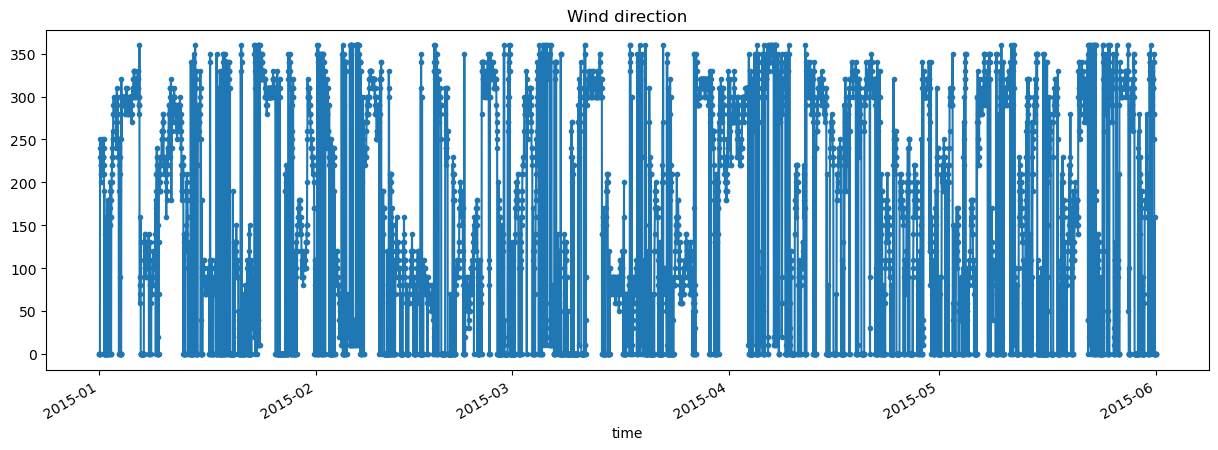

In [595]:
weather['wdird'].plot(figsize=(15,5), 
                    style='.-',
                     title='Wind direction')
plt.show()

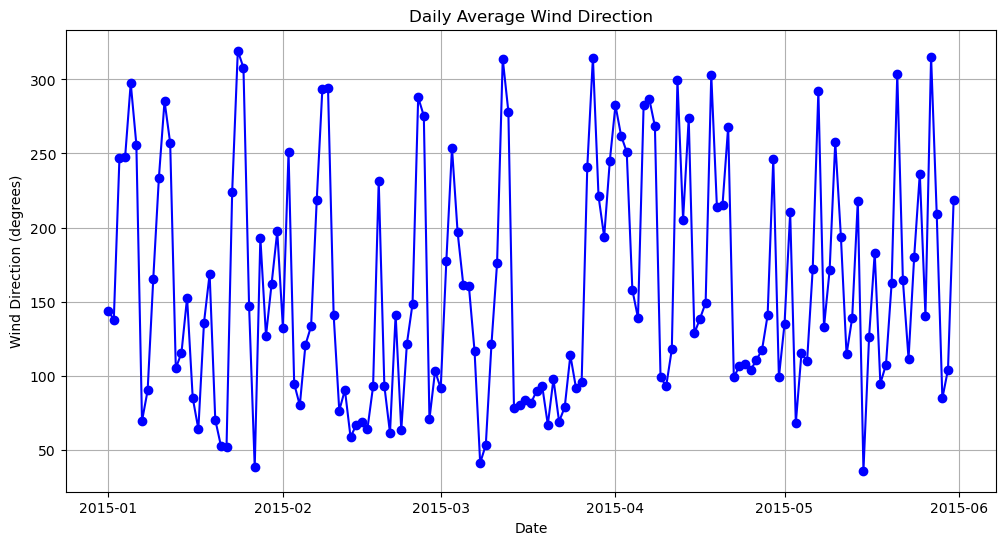

In [596]:
weather['wdird'] = pd.to_numeric(weather['wdird'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Resample the data to daily frequency and calculate the mean wind direction for each day
daily_wind = weather['wdird'].resample('D').mean()

# Plot the daily average wind direction
plt.figure(figsize=(12, 6))

plt.plot(daily_wind.index, daily_wind, marker='o', linestyle='-', color='b')

plt.title('Daily Average Wind Direction')
plt.xlabel('Date')
plt.ylabel('Wind Direction (degrees)')

plt.grid(True)
plt.show()

In [597]:
weather.columns

Index(['tempm', 'hum', 'wspdm', 'wdird', 'wdire', 'pressurem', 'vism',
       'windchillm', 'fog', 'rain', 'snow', 'hail', 'thunder'],
      dtype='object')

In [598]:
weather[['tempm', 'hum', 'wspdm',
         #'wdird', 'wdire',
         'pressurem', 'vism',
       'windchillm', 'fog', 'rain', 'snow', 'hail', 'thunder']]

,tempm,hum,wspdm,pressurem,vism,windchillm,fog,rain,snow,hail,thunder
time,,,,,,,,,,,
2015-01-01 00:00:00,-12.0,85,5.6,1037,5.0,-15.5,0,0,0,0,0
2015-01-01 00:30:00,-11.0,85,3.7,1036,4.0,-999.0,0,0,0,0,0
2015-01-01 01:00:00,-10.0,86,3.7,1036,4.0,-999.0,0,0,0,0,0
2015-01-01 01:30:00,-10.0,86,0.0,1036,5.0,-999.0,0,0,0,0,0
2015-01-01 02:00:00,-9.0,79,0.0,1036,4.0,-999.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2015-05-31 21:30:00,16.0,77,3.7,1019,-9999.0,-999.0,0,0,0,0,0
2015-05-31 22:00:00,14.0,88,3.7,1019,-9999.0,-999.0,0,0,0,0,0
2015-05-31 22:30:00,14.0,88,3.7,1019,-9999.0,-999.0,0,0,0,0,0


In [599]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7235 entries, 2015-01-01 00:00:00 to 2015-05-31 23:30:00
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tempm       7235 non-null   float64
 1   hum         7235 non-null   int64  
 2   wspdm       7235 non-null   float64
 3   wdird       7235 non-null   int64  
 4   wdire       7235 non-null   object 
 5   pressurem   7235 non-null   int64  
 6   vism        7235 non-null   float64
 7   windchillm  7235 non-null   float64
 8   fog         7235 non-null   object 
 9   rain        7235 non-null   object 
 10  snow        7235 non-null   object 
 11  hail        7235 non-null   object 
 12  thunder     7235 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 791.3+ KB


In [600]:
weather = weather[['tempm', 'hum', 'wspdm',
         #'wdird', 'wdire',
         'pressurem', 
                   #'vism',
       'windchillm', 
        'fog', 'rain', 'snow', 'hail', 'thunder'
                   ]]

In [601]:
weather2 = weather[['tempm', 'hum', 'wspdm',
         #'wdird', 'wdire',
         'pressurem', 
                   #'vism',
       'windchillm', 
        #'fog', 'rain', 'snow', 'hail', 'thunder'
                   ]]

In [602]:
weather

,tempm,hum,wspdm,pressurem,windchillm,fog,rain,snow,hail,thunder
time,,,,,,,,,,
2015-01-01 00:00:00,-12.0,85,5.6,1037,-15.5,0,0,0,0,0
2015-01-01 00:30:00,-11.0,85,3.7,1036,-999.0,0,0,0,0,0
2015-01-01 01:00:00,-10.0,86,3.7,1036,-999.0,0,0,0,0,0
2015-01-01 01:30:00,-10.0,86,0.0,1036,-999.0,0,0,0,0,0
2015-01-01 02:00:00,-9.0,79,0.0,1036,-999.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2015-05-31 21:30:00,16.0,77,3.7,1019,-999.0,0,0,0,0,0
2015-05-31 22:00:00,14.0,88,3.7,1019,-999.0,0,0,0,0,0
2015-05-31 22:30:00,14.0,88,3.7,1019,-999.0,0,0,0,0,0


In [603]:
corrM = weather2.corr()
corrM

,tempm,hum,wspdm,pressurem,windchillm
tempm,1.000000,-0.504714,-0.002633,-0.223260,-0.616646
hum,-0.504714,1.000000,-0.014066,-0.241427,0.284377
wspdm,-0.002633,-0.014066,1.000000,0.008167,0.021639
pressurem,-0.223260,-0.241427,0.008167,1.000000,0.059085
windchillm,-0.616646,0.284377,0.021639,0.059085,1.000000


In [604]:
weather.loc[weather['windchillm'] == -999, 'windchillm'] = np.nan

In [605]:
weather2.loc[weather2['windchillm'] == -999, 'windchillm'] = np.nan

In [606]:
corrM = weather2.corr()
corrM

,tempm,hum,wspdm,pressurem,windchillm
tempm,1.000000,-0.504714,-0.002633,-0.223260,0.957578
hum,-0.504714,1.000000,-0.014066,-0.241427,-0.133504
wspdm,-0.002633,-0.014066,1.000000,0.008167,-0.064217
pressurem,-0.223260,-0.241427,0.008167,1.000000,-0.125035
windchillm,0.957578,-0.133504,-0.064217,-0.125035,1.000000


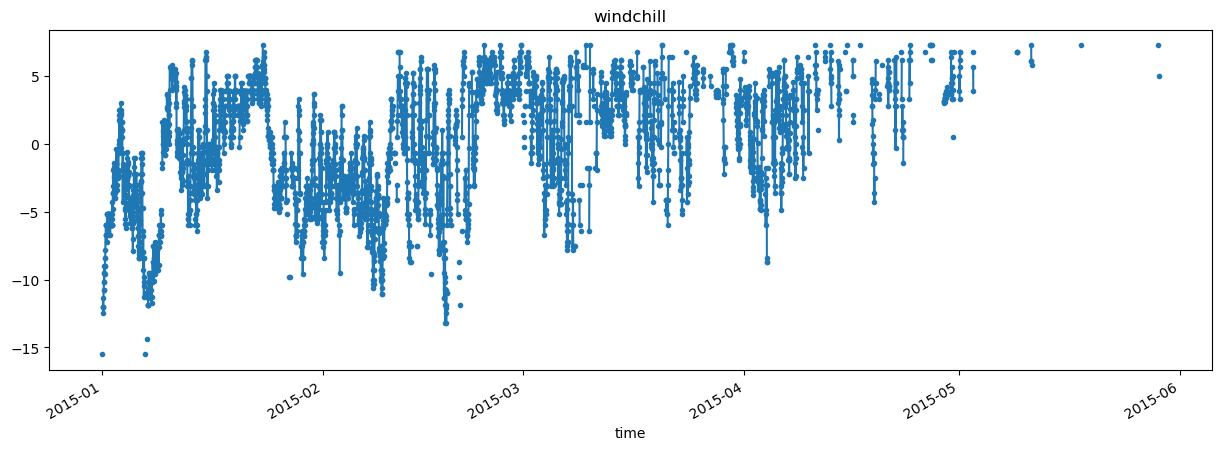

In [607]:
weather['windchillm'].plot(figsize=(15,5),
                            style='.-',
                            title='windchill'
                           )
plt.show()

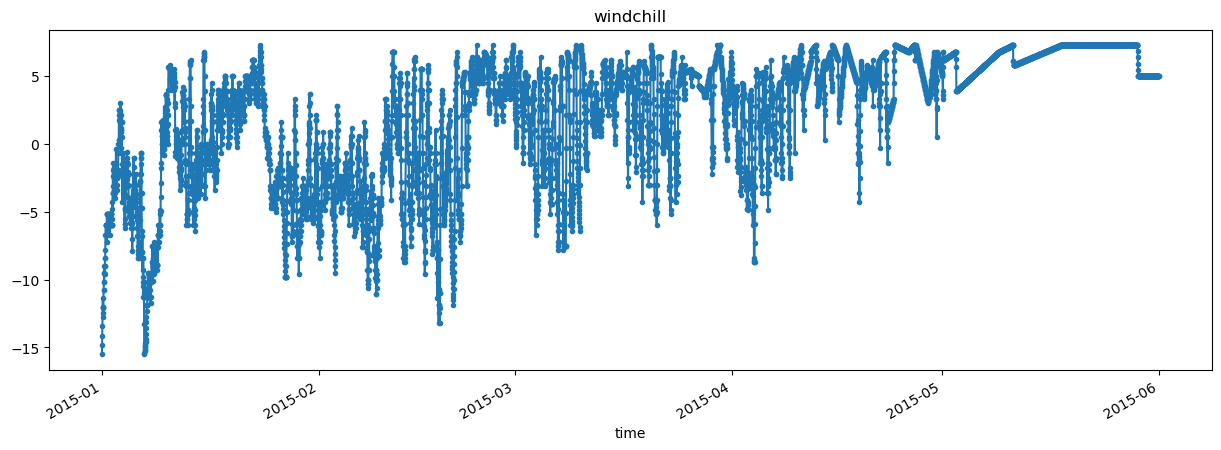

In [608]:
weather['windchillm'].interpolate().plot(figsize=(15,5),
                            style='.-',
                            title='windchill'
                           )
plt.show()

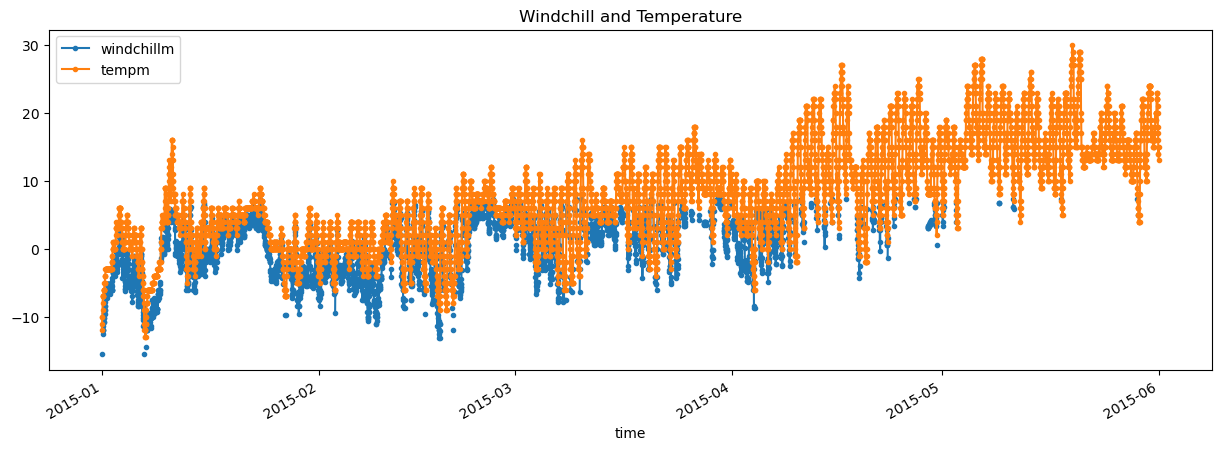

In [609]:
weather[['windchillm', 'tempm']].plot(figsize=(15, 5), style='.-', title='Windchill and Temperature')
plt.show()


C:\Users\nagyn\AppData\Local\Temp\ipykernel_6016\3049576834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['windchillm'] = pd.to_numeric(weather['windchillm'], errors='coerce')  # Convert to numeric, coerce errors to NaN
C:\Users\nagyn\AppData\Local\Temp\ipykernel_6016\3049576834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['windchillm'].fillna(weather['tempm'] - 2, inplace=True)


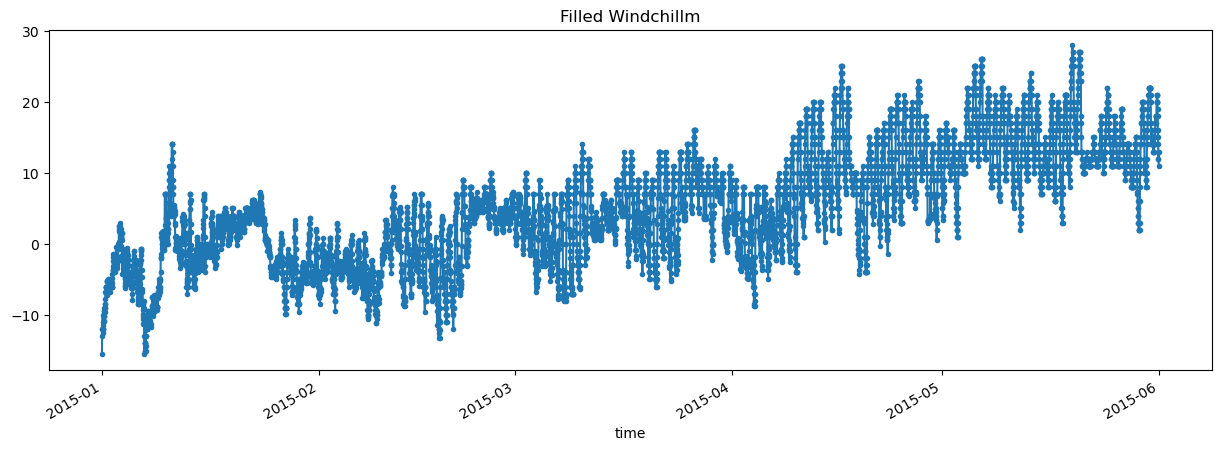

In [610]:
# Assuming 'weather2' is your DataFrame with 'tempm' and 'windchillm' columns
weather['windchillm'] = pd.to_numeric(weather['windchillm'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Fill NaN values in 'windchillm' by lowering 'tempm' by -2
weather['windchillm'].fillna(weather['tempm'] - 2, inplace=True)

# Plot the 'windchillm' column with filled values for verification
weather['windchillm'].plot(figsize=(15, 5), style='.-', title='Filled Windchillm')
plt.show()


In [611]:
weather.isnull().sum()

tempm         0
hum           0
wspdm         0
pressurem     0
windchillm    0
fog           0
rain          0
snow          0
hail          0
thunder       0
dtype: int64

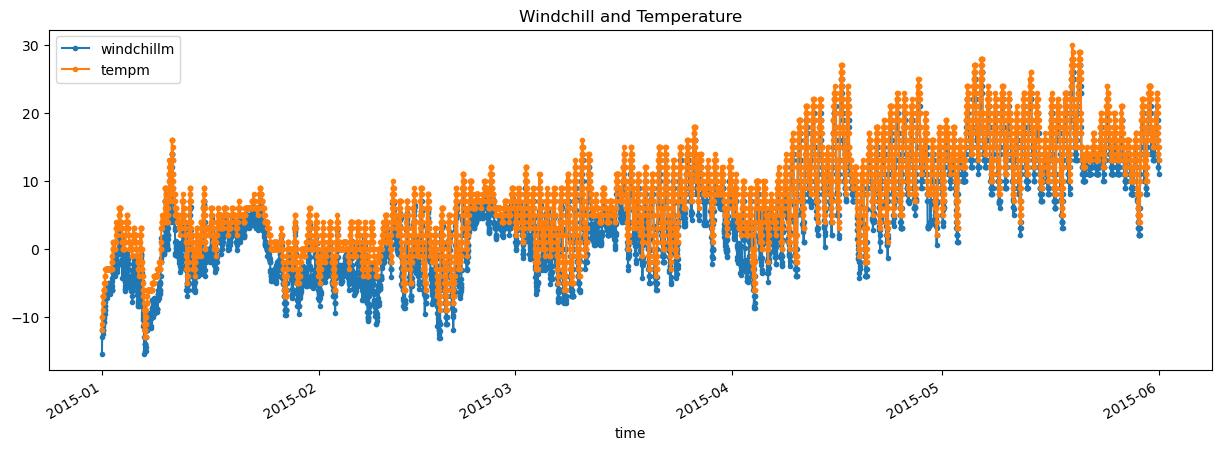

In [612]:
weather[['windchillm', 'tempm']].plot(figsize=(15, 5), style='.-', title='Windchill and Temperature')
plt.show()


In [613]:
weather.tail(20)

,tempm,hum,wspdm,pressurem,windchillm,fog,rain,snow,hail,thunder
time,,,,,,,,,,
2015-05-31 14:00:00,20.0,56,13.0,1020,18.0,0,0,0,0,0
2015-05-31 14:30:00,19.0,56,14.8,1019,17.0,0,0,0,0,0
2015-05-31 15:00:00,20.0,52,9.3,1019,18.0,0,0,0,0,0
2015-05-31 15:30:00,20.0,56,9.3,1019,18.0,0,0,0,0,0
2015-05-31 16:00:00,22.0,46,7.4,1019,20.0,0,0,0,0,0
2015-05-31 16:30:00,22.0,41,7.4,1019,20.0,0,0,0,0,0
2015-05-31 17:00:00,23.0,47,7.4,1018,21.0,0,0,0,0,0
2015-05-31 17:30:00,22.0,46,3.7,1018,20.0,0,0,0,0,0
2015-05-31 18:00:00,23.0,44,5.6,1018,21.0,0,0,0,0,0


In [614]:
weather.head(20)

,tempm,hum,wspdm,pressurem,windchillm,fog,rain,snow,hail,thunder
time,,,,,,,,,,
2015-01-01 00:00:00,-12.0,85,5.6,1037,-15.5,0,0,0,0,0
2015-01-01 00:30:00,-11.0,85,3.7,1036,-13.0,0,0,0,0,0
2015-01-01 01:00:00,-10.0,86,3.7,1036,-12.0,0,0,0,0,0
2015-01-01 01:30:00,-10.0,86,0.0,1036,-12.0,0,0,0,0,0
2015-01-01 02:00:00,-9.0,79,0.0,1036,-11.0,0,0,0,0,0
2015-01-01 02:30:00,-8.0,79,3.7,1036,-10.0,0,0,0,0,0
2015-01-01 03:00:00,-7.0,74,9.3,1036,-11.4,0,0,0,0,0
2015-01-01 03:30:00,-7.0,74,11.1,1036,-12.0,0,0,0,0,0
2015-01-01 04:00:00,-7.0,74,11.1,1035,-12.0,0,0,0,0,0


In [615]:
train.head()

,bicycle_id,start_time,end_time,start_location,end_location
0,86602,2015-01-01 00:04:00,2015-01-01 00:10:00,802,508
1,86157,2015-01-01 00:04:00,2015-01-01 00:16:00,802,508
2,86091,2015-01-01 00:08:00,2015-01-01 00:32:00,513,1106
3,86908,2015-01-01 00:09:00,2015-01-01 00:29:00,513,604
4,86758,2015-01-01 00:10:00,2015-01-01 00:11:00,508,508


In [629]:
train['rounded_start_time'] = pd.to_datetime(train['start_time']).dt.floor('30T').dt.time
train['year_month_day'] = pd.to_datetime(train['start_time']).dt.strftime('%Y-%m-%d') + ' ' + train['rounded_start_time'].astype(str)

In [629]:
train['rounded_start_time'] = pd.to_datetime(train['start_time']).dt.floor('30T').dt.time
train['year_month_day'] = pd.to_datetime(train['start_time']).dt.strftime('%Y-%m-%d') + ' ' + train['rounded_start_time'].astype(str)

In [630]:

train.head(20)

,bicycle_id,start_time,end_time,start_location,end_location,rounded_start_time,year_month_day
0,86602,2015-01-01 00:04:00,2015-01-01 00:10:00,802,508,00:00:00,2015-01-01 00:00:00
1,86157,2015-01-01 00:04:00,2015-01-01 00:16:00,802,508,00:00:00,2015-01-01 00:00:00
2,86091,2015-01-01 00:08:00,2015-01-01 00:32:00,513,1106,00:00:00,2015-01-01 00:00:00
3,86908,2015-01-01 00:09:00,2015-01-01 00:29:00,513,604,00:00:00,2015-01-01 00:00:00
4,86758,2015-01-01 00:10:00,2015-01-01 00:11:00,508,508,00:00:00,2015-01-01 00:00:00
5,86075,2015-01-01 00:15:00,2015-01-01 00:21:00,516,901,00:00:00,2015-01-01 00:00:00
6,86814,2015-01-01 00:19:00,2015-01-01 00:30:00,902,902,00:00:00,2015-01-01 00:00:00
7,86176,2015-01-01 00:19:00,2015-01-01 00:30:00,902,902,00:00:00,2015-01-01 00:00:00
8,86548,2015-01-01 00:22:00,2015-01-01 00:31:00,611,705,00:00:00,2015-01-01 00:00:00
9,86027,2015-01-01 00:22:00,2015-01-01 00:31:00,611,705,00:00:00,2015-01-01 00:00:00


In [632]:
train.shape

(135484, 7)

In [633]:
weather.shape

(7235, 10)

In [ ]:
train

In [ ]:
train['year_month_day'].value_counts().plot(kind='bar', figsize=(15, 5), title='Histogram of Rounded Start Times')
plt.xlabel('year_month_day')
plt.ylabel('Count')
plt.show()

In [ ]:
weather.to_csv('weather_data2.csv', index=True)  # Save weather data to CSV with index
train.to_csv('train_data2.csv', index=False)     # Save train data to CSV without index


In [ ]:
train


In [627]:
weather


,tempm,hum,wspdm,pressurem,windchillm,fog,rain,snow,hail,thunder
time,,,,,,,,,,
2015-01-01 00:00:00,-12.0,85,5.6,1037,-15.5,0,0,0,0,0
2015-01-01 00:30:00,-11.0,85,3.7,1036,-13.0,0,0,0,0,0
2015-01-01 01:00:00,-10.0,86,3.7,1036,-12.0,0,0,0,0,0
2015-01-01 01:30:00,-10.0,86,0.0,1036,-12.0,0,0,0,0,0
2015-01-01 02:00:00,-9.0,79,0.0,1036,-11.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2015-05-31 21:30:00,16.0,77,3.7,1019,14.0,0,0,0,0,0
2015-05-31 22:00:00,14.0,88,3.7,1019,12.0,0,0,0,0,0
2015-05-31 22:30:00,14.0,88,3.7,1019,12.0,0,0,0,0,0


In [ ]:
train.merge(weather, left_on='', right_on='rkey')